## Decision Trees for Regression and Classification

<div style="display: flex; align-items: stretch;">
    <figure>
        <img src="90s_flowchart.png"/>
        <figcaption><a href="https://xkcd.com/210/">https://xkcd.com/210/</a></figcaption>
    </figure>
    <figure>
        <img src="tree.png"/>
        <figcaption><a href="https://xkcd.com/210/">https://xkcd.com/835/</a></figcaption>
    </figure>
</div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

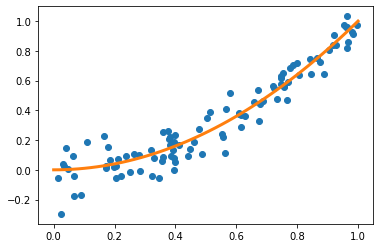

In [2]:
def r(x):
    return x**2

n = 100
X = np.random.uniform(size=n)
y = r(X) + np.random.normal(0, 0.1, size=n)
plt.plot(X, y, 'o')

u = np.linspace(0, 1)
plt.plot(u, r(u), lw=3);

Find the best fit to $(X, y)$ by a step function of the form
$$
\widehat r(x) = \begin{cases}
a &\text{if }x \leq s,\\
b &\text{if }x > s.\\
\end{cases}
$$

In [3]:
def rhat(x, s, a, b):
    return a*(x <= s) + b*(x > s)

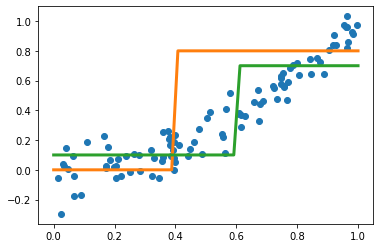

In [4]:
sab0 = [0.4, 0, 0.8]
sab1 = [0.6, 0.1, 0.7]
plt.plot(X, y, 'o')
plt.plot(u, rhat(u, *sab0), lw=3)
plt.plot(u, rhat(u, *sab1), lw=3);

In [5]:
from sklearn.metrics import mean_squared_error
mse0 = mean_squared_error(y, rhat(X, *sab0))
mse1 = mean_squared_error(y, rhat(X, *sab1))
print(mse0, mse1) # mse1 < mse0

0.07563235263411448 0.029533674373949194


If our goal is to minimize MSE, $a$ and $b$ are determined by $s$.

By definition of $\widehat r$,
$$
\begin{aligned}
\sum_i \big(y_i - \widehat r(x_i)\big)^2 &= 
\sum_{i:x_i \leq s}\big(y_i - \widehat r(x_i)\big)^2 +
\sum_{i:x_i > s}\big(y_i - \widehat r(x_i)\big)^2\\
&= \sum_{i:x_i \leq s}\big(y_i - a\big)^2 +
\sum_{i:x_i > s}\big(y_i - b\big)^2.
\end{aligned}
$$
<div style="background-color: papayawhip; padding: 10px; margin-bottom: 10px">
    For any sequence of numbers $x_1,x_2,\ldots,x_n$,
    $$
    f(y) = \sum_i(x_i-y)^2
    $$
    is minimized at
    $$y=\bar x =\dfrac1n\sum_i x_i.$$
</div>

Therefore,
$$
\operatorname*{argmin}_{a,b}\left(\sum_{i:x_i \leq s}\big(y_i - a\big)^2 +
\sum_{i:x_i > s}\big(y_i - b\big)^2
\right)=
\sum_{i:x_i \leq s}\big(y_i - \overline{y}_s^L\big)^2 +
\sum_{i:x_i > s}\big(y_i - \overline{y}_s^R\big)^2,
$$

where
$$
\overline{y}_s^L = \sum_{i:x_i \leq s}y_i
\qquad\text{and}\qquad
\overline{y}_s^R = \sum_{i:x_i > s}y_i.
$$


0.032059593199234356


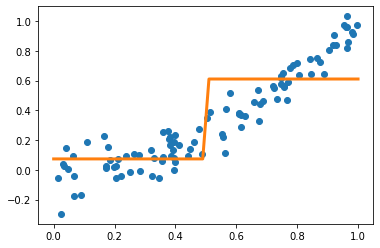

In [6]:
# Redefine rhat accordingly.
def rhat(u, s, X, y):
    return np.mean(y[X <= s])*(u <= s) + np.mean(y[X > s])*(u > s)

plt.plot(X, y, 'o')
plt.plot(u, rhat(u, 0.5, X, y), lw=3);
mse = mean_squared_error(y, rhat(X, 0.5, X, y))
print(mse)

Now, we minimize over $s$.


MSE minimized at s = 0.64
MSE(0.64) = 0.027



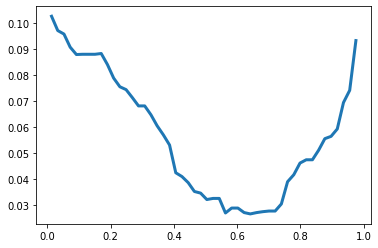

In [7]:
ss = np.linspace(np.min(X), np.max(X), endpoint=False)
mses = []
for s in ss:
    mse = mean_squared_error(y, rhat(X, s, X, y))
    mses.append(mse)
    
plt.plot(ss, mses, lw=3)

s_opt = ss[np.argmin(mses)]
print(f"\nMSE minimized at s = {s_opt:.2}\nMSE({s_opt:.2}) = {np.min(mses):.2}\n")

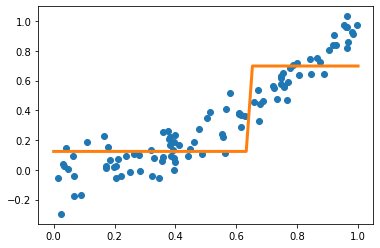

In [8]:
plt.plot(X, y, 'o')
plt.plot(u, rhat(u, s_opt, X, y), lw=3);

Let's improve our approximation by replacing each of the constant segments in the above plot by a one-step function.

sL_opt = 0.4941531932257195, sR_opt = 0.8874903307231627


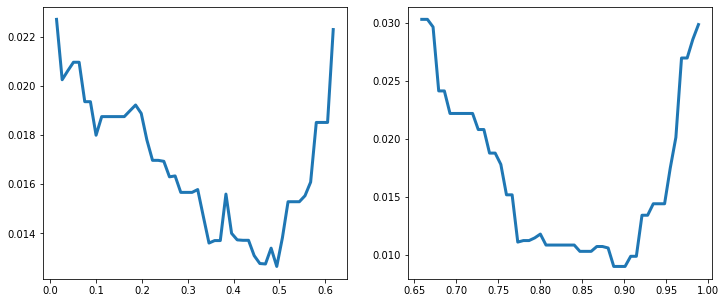

In [9]:
XL = X[X < s_opt]
yL = y[X < s_opt]
uL = u[u < s_opt]

XR = X[X >= s_opt]
yR = y[X >= s_opt]
uR = u[u >= s_opt]

fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 5))

ss = np.linspace(np.min(XL), np.max(XL), endpoint=False)
mses = []
for s in ss:
    mse = mean_squared_error(yL, rhat(XL, s, XL, yL))
    mses.append(mse)
sL_opt = ss[np.argmin(mses)]
a0.plot(ss, mses, lw=3)
    
ss = np.linspace(np.min(XR), np.max(XR), endpoint=False)
mses = []
for s in ss:
    mse = mean_squared_error(yR, rhat(XR, s, XR, yR))
    mses.append(mse)
sR_opt = ss[np.argmin(mses)]
a1.plot(ss, mses, lw=3)

print(f"sL_opt = {sL_opt}, sR_opt = {sR_opt}")
# s_opt = ss[np.argmin(mses)]
# print(f"\nMSE minimized at s = {s_opt:.2}\nMSE({s_opt:.2}) = {np.min(mses):.2}\n")

0.073345980681691 0.3337615672631587 0.5889770013642716 0.9077730662836416


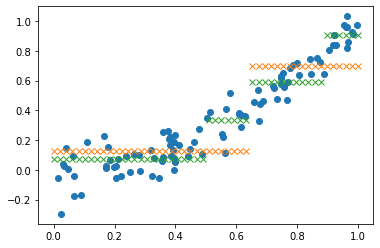

In [25]:
ybarLL = np.mean(yL[XL < sL_opt])
ybarLR = np.mean(yL[XL >= sL_opt])
ybarRL = np.mean(yR[XR < sR_opt])
ybarRR = np.mean(yR[XR >= sR_opt])
print(ybarLL, ybarLR, ybarRL, ybarRR)

vL = ybarLL*(uL < sL_opt) + ybarLR*(uL >= sL_opt)
vR = ybarRL*(uR < sR_opt) + ybarRR*(uR >= sR_opt)
v = np.concatenate((vL, vR))

plt.plot(X, y, 'o')
plt.plot(u, rhat(u, s_opt, X, y), 'x', lw=3);
plt.plot(u, v, 'x', lw=5)

In [17]:
D = {"s": s_opt, 
     "L": {"s": sL_opt, "L": ybarLL, "R": ybarLR},
     "R": {"s": sR_opt, "L": ybarRL, "R": ybarRR}
    }

In [18]:
# node :: {s: number, L: node, R: node} or number

{'s': 0.6415789934177136,
 'L': {'s': 0.4941531932257195,
  'L': 0.073345980681691,
  'R': 0.3337615672631587},
 'R': {'s': 0.8874903307231627,
  'L': 0.5889770013642716,
  'R': 0.9077730662836416}}

In [20]:
def predict(X, D):
    y = np.zeros_like(X)
    IL = X < D["s"]
    IR = X >= D["s"]
    if type(D["L"]) == dict:
        y[IL] = predict(X[IL], D["L"])
    else:
        y[IL] = D["L"]
    if type(D["R"]) == dict:
        y[IR] = predict(X[IR], D["R"])
    else:
        y[IR] = D["R"]
    return y

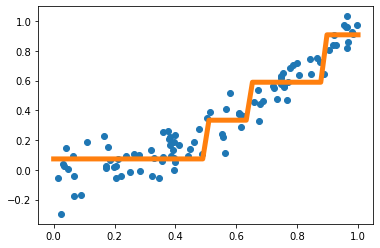

In [22]:
plt.plot(X, y, 'o')
y_p = predict(u, D)
plt.plot(u, y_p, lw=5);

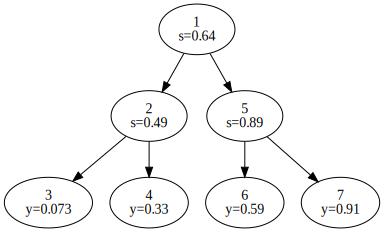

In [14]:
from graphviz import Digraph

def viz(D, G, counter={"count": 1}, parent=None):
    name = str(counter["count"])
    counter["count"] += 1
    if type(D) != dict:
        G.node(name, label=f"{name}\ny={D:.2}")
    else:
        G.node(name, label=f"{name}\ns={D['s']:.2}")
        viz(D["L"], G, counter, parent=name)
        viz(D["R"], G, counter, parent=name)
    if parent is not None:
        G.edge(parent, name)

G = Digraph()
viz(D, G)
G

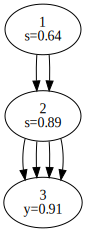

In [26]:
from graphviz import Digraph

def viz(D, G, counter=1, parent=None):
    name = str(counter)
    counter += 1
    if type(D) != dict:
        G.node(name, label=f"{name}\ny={D:.2}")
    else:
        G.node(name, label=f"{name}\ns={D['s']:.2}")
        viz(D["L"], G, counter, parent=name)
        viz(D["R"], G, counter, parent=name)
    if parent is not None:
        G.edge(parent, name)

G = Digraph()
viz(D, G)
G

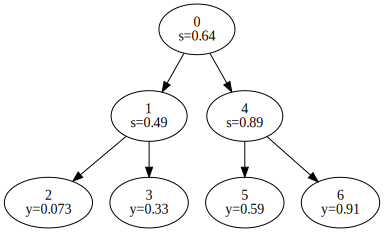

In [30]:
def viz(D):
    counter = 0
    def _viz(D, G, parent=None):
        nonlocal counter
        name = str(counter)
        counter += 1
        if type(D) != dict:
            G.node(name, label=f"{name}\ny={D:.2}")
        else:
            G.node(name, label=f"{name}\ns={D['s']:.2}")
            _viz(D["L"], G, parent=name)
            _viz(D["R"], G, parent=name)
        if parent is not None:
            G.edge(parent, name)
    G = Digraph()
    _viz(D, G)
    return G

viz(D)

In [31]:
from sklearn.tree import DecisionTreeRegressor

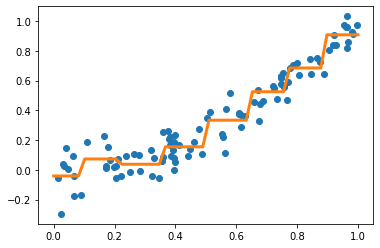

In [41]:
M = DecisionTreeRegressor(min_samples_leaf=10)
M.fit(X.reshape(-1,1), y)
v = M.predict(u.reshape(-1, 1))
plt.plot(X, y, 'o')
plt.plot(u, v, lw=3)

In [49]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [94]:
X, y = load_diabetes(return_X_y=True)

In [128]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, shuffle=True)
M = DecisionTreeRegressor(min_samples_leaf=10)
M.fit(X_tr, y_tr)
y_pr = M.predict(X_te)
mse_te = mean_squared_error(y_te, y_pr)
print(f"mse_te={mse_te}")

mse_te=4565.581860266998


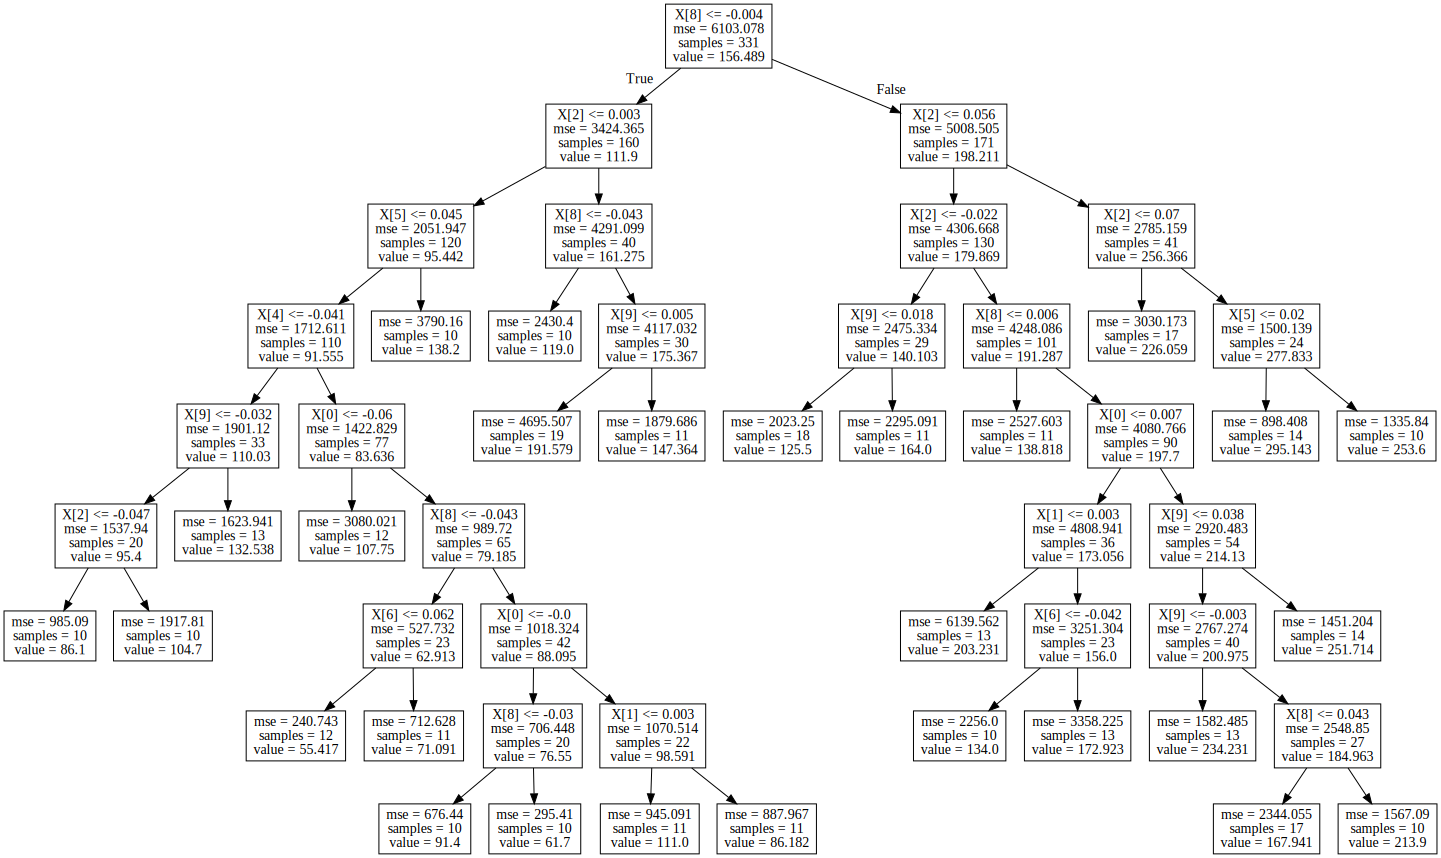

In [129]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(M, out_file=None) 
G = graphviz.Source(dot_data)
G

In [106]:
np.mean(y_tr)

150.87009063444108

In [130]:
mse = np.mean(np.square(y_tr - y_tr.mean()))
IL = X_tr[:,2] <= 0.005
IR = X_tr[:,2] > 0.005
y_tr_L = y_tr[IL]
y_tr_R = y_tr[IR]
mse_L = np.mean(np.square(y_tr_L - y_tr_L.mean()))
mse_R = np.mean(np.square(y_tr_R - y_tr_R.mean()))
print(mse_L, mse_R)
decrease = mse - (len(y_tr_L)/len(y_tr)*mse_L + len(y_tr_R)/len(y_tr)*mse_R)
print(decrease)

3706.915771484375 5251.7898659489665
1747.4081374593052


In [131]:
M.feature_importances_[np.argsort(M.feature_importances_)]

array([0.        , 0.        , 0.0076075 , 0.01227532, 0.01671703,
       0.02289328, 0.03798459, 0.06301127, 0.3050049 , 0.5345061 ])

In [132]:
np.argsort(M.feature_importances_)

array([3, 7, 6, 4, 1, 5, 0, 9, 2, 8])

In [127]:
M.feature_importances_[[3, 8, 2, 9]].sum()

0.9130316730315929

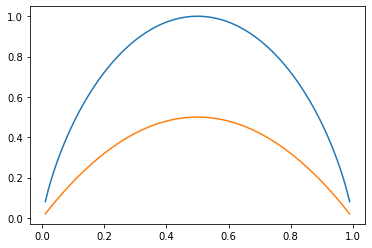

In [141]:
# p0 = p, p1 = 1-p
p = np.arange(0.01, 1, 0.01)
H = -p*np.log2(p) - (1-p)*np.log2(1-p)
plt.plot(p, H)
G = p*(1-p) + (1-p)*p
plt.plot(p, G)

In [156]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
# X = X[:, 2:]

X_tr, X_te, y_tr, y_te = train_test_split(X, y)
M = DecisionTreeClassifier()
M.fit(X_tr, y_tr)
y_pr = M.predict(X_te)
acc = accuracy_score(y_te, y_pr)
print(acc)

1.0


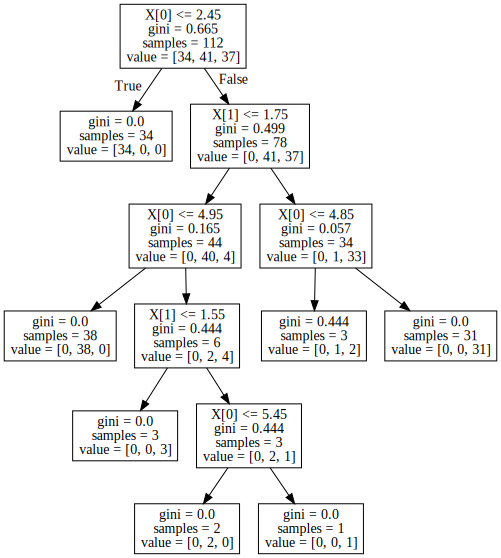

In [145]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(M, out_file=None) 
G = graphviz.Source(dot_data)
G

In [157]:
M.feature_importances_

array([0.        , 0.01788423, 0.58180971, 0.40030605])